In [86]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# *Load model and set parameters*

In [53]:
model = load_model('/Users/wangfan/Documents/wukm/Uncertainty Projects/tweets/tweets.keras')

X_test = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/tweets/X_test_tweets.npy')
y_test = np.load('/Users/wangfan/Documents/wukm/Uncertainty Projects/tweets/y_test_tweets.npy')
num_observations = 100
num_classes = 2

# *Monte-Carlo Dropout*

In [54]:
observations = []

for i in range(num_observations):
    print(i)
    observations.append(model(X_test, training=True))

In [55]:
observations = np.array(observations)
observations.shape

(100, 33583, 2)

In [56]:
observations_MC = np.mean(observations,axis = 0)
observations_MC.shape

(33583, 2)

# *Predictions*

In [57]:
preds = np.argmax(observations[0,:,:],axis = 1)
preds_MC = np.argmax(observations_MC,axis = 1)

print(preds.shape)
print(preds_MC.shape)

(33583,)
(33583,)


# *Uncertainty Quantifications*

In [58]:
# Misclassification Probability
MP = []
for i in range(observations.shape[1]):
    MP.append(1-observations[0,i,preds[i]])
len(MP)

33583

In [79]:
# Information Entropy
Entropy_MC = []
for i in range(observations.shape[1]):
  Entropy_MC.append(-1*np.sum(observations_MC[i,:]*np.log2(observations_MC[i,:])))
len(Entropy_MC)

33583

In [82]:
# Standard Deviation of the Predicted Probabilities of the Predicted Class
DPP = []
for i in range(observations.shape[1]):
    DPP.append(np.std(observations[:,i,preds_MC[i]]))
DPP = (DPP-np.min(DPP))/(np.max(DPP)-np.min(DPP))
len(DPP)

33583

# *Uncertainty Predicts Accuracy*

In [83]:
T_F = []
T_F_MC = []

for i in range(observations.shape[1]):
    if(preds[i] == np.argmax(y_test[i])):
        T_F.append('T')
    else:
        T_F.append('F')
    if(preds_MC[i] == np.argmax(y_test[i])):
        T_F_MC.append('T')
    else:
        T_F_MC.append('F')

print(T_F)
print(T_F_MC)

['T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'T', 'F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T', 'T', 'T', 'T',

In [84]:
def cal_bin(uc_list,T_F_list,slices,acc):
    temp_List = []
    u_List = []
    a = 0
    b = 1/slices

    for j in range(slices):

        for i in range(len(uc_list)):

            if a <= uc_list[i] <= b:
                temp_List.append(T_F_list[i])

        if acc:
            if(len(temp_List)==0):
                u_List.append(0)
            else:
                u_List.append(temp_List.count('T')/len(temp_List))
        else:
            u_List.append(len(temp_List))
        temp_List =[]

        a = a+1/slices
        b = b+1/slices

    print(u_List)
    return u_List

In [85]:
uList_MP = cal_bin(MP,T_F,10,True)
uList_Entropy_MC = cal_bin(Entropy_MC,T_F_MC,10,True)
uList_DPP = cal_bin(DPP,T_F_MC,10,True)

[0.943099787685775, 0.8173293974648377, 0.7326046387629965, 0.6544039617969579, 0.5448877805486284, 0, 0, 0, 0, 0]
[0.9968065693430657, 0.9886057592707685, 0.9739823751573646, 0.9487179487179487, 0.9098660170523751, 0.8468146027201146, 0.7963743676222597, 0.7551546391752577, 0.6856076316880962, 0.5702145740386658]
[0.995982468955442, 0.9804718365504007, 0.9113509580402619, 0.7558566186847304, 0.678372841673983, 0.6533149171270718, 0.6141479099678456, 0.6190476190476191, 0.5813008130081301, 0.5238095238095238]


In [88]:
uList_MP_count = cal_bin(MP,T_F,10,False)
uList_Entropy_MC_count = cal_bin(Entropy_MC,T_F_MC,10,False)
uList_DPP_count = cal_bin(DPP,T_F_MC,10,False)

[18840, 5759, 3751, 2827, 2406, 0, 0, 0, 0, 0]
[2192, 4827, 4766, 3900, 3284, 2794, 2372, 2328, 2411, 4707]
[2738, 8859, 8246, 7086, 3417, 1448, 933, 567, 246, 42]


# *Plot* 

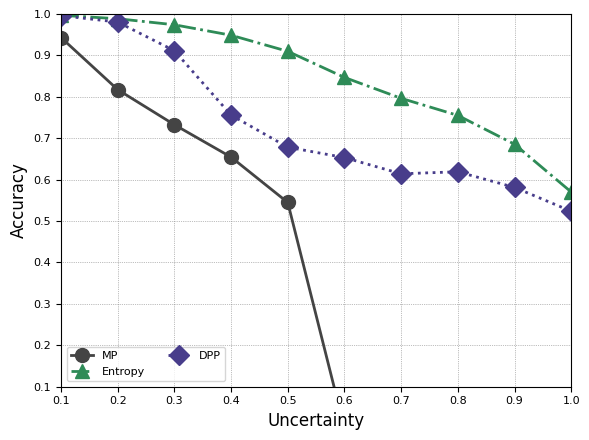

In [87]:
#ideal_line = np.arange(0.95, -0.05, -0.1)
x_values = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=8)
plt.ylim(0.1, 1)
plt.xlim(0.1, 1)
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of dark colors
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']

# Plot the data with different dark colors, line styles, and markers
line1, = plt.plot(x_values, uList_MP, color=dark_colors[0], linestyle='-', marker='o', markersize=10, linewidth=2, label='MP')
#line2, = plt.plot(x_values, uList_MP_MC, color=dark_colors[1], linestyle='--', marker='s', markersize=10, linewidth=2, label='MP_MC')
line3, = plt.plot(x_values, uList_Entropy_MC, color=dark_colors[2], linestyle='-.', marker='^', markersize=10, linewidth=2, label='Entropy')
line4, = plt.plot(x_values, uList_DPP, color=dark_colors[3], linestyle=':', marker='D', markersize=10, linewidth=2, label='DPP')


# Add a legend
plt.legend(handles=[line1, line3, line4], loc='lower left', fontsize=8, ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

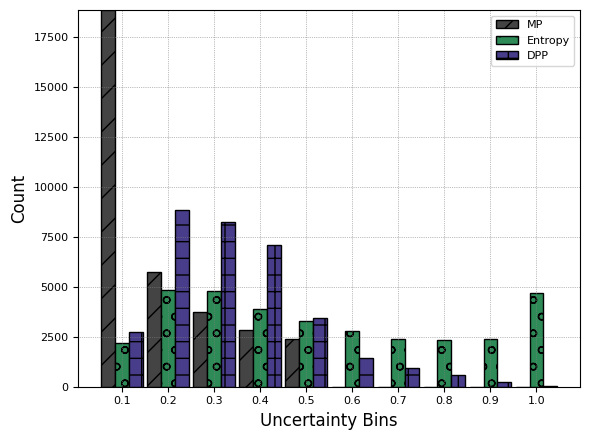

In [93]:
# Determine the maximum length
max_length = len(uList_MP)

# Generate x values based on the maximum length, each interval is 0.1
x_values = np.arange(0.1, 0.1 * max_length + 0.1, 0.1)

bar_width = 0.03  # Set the width of each bar

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=8)  # Set x-axis tick size to match previous plot style
plt.yticks(fontsize=8)  # Set y-axis tick size to match previous plot style
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)  # Set y-axis range
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of darker colors with higher contrast
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']  # Dark gray, saddle brown, sea green, dark slate blue
hatches = ['/', '\\', 'o', '+']  # Distinct hatch patterns for easy recognition

# Plot the histograms with hatch patterns for better visibility in black and white
bar1 = plt.bar(x_values - 1 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
#bar2 = plt.bar(x_values - 0.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values, uList_Entropy_MC_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 1 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='DPP', edgecolor='black')

# Add a legend
plt.legend(handles=[bar1, bar3, bar4], loc='upper right', fontsize=8)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
#Zoom in
uList_MP_count = uList_MP_count[1:]
uList_Entropy_MC_count = uList_Entropy_MC_count[1:]
uList_DPP_count = uList_DPP_count[1:]

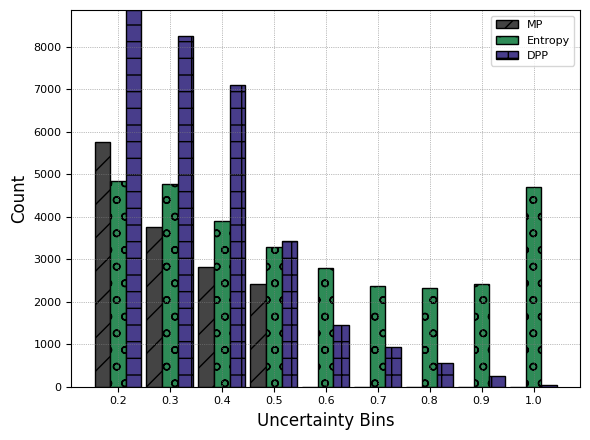

In [95]:


# Determine the maximum length
max_length = len(uList_MP)

# Generate x values based on the maximum length, each interval is 0.1
x_values = np.arange(0.2, 0.1 * max_length + 0.1, 0.1)

bar_width = 0.03  # Set the width of each bar

plt.figure(figsize=(6, 4.5), dpi=100)
plt.xlabel('Uncertainty Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_values, fontsize=8)  # Set x-axis tick size to match previous plot style
plt.yticks(fontsize=8)  # Set y-axis tick size to match previous plot style
plt.ylim(0, max(max(uList_MP_count), max(uList_DPP_count)) + 1)  # Set y-axis range
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')

# Define a list of darker colors with higher contrast
dark_colors = ['#444444', '#8B4513', '#2E8B57', '#483D8B']  # Dark gray, saddle brown, sea green, dark slate blue
hatches = ['/', '\\', 'o', '+']  # Distinct hatch patterns for easy recognition

# Plot the histograms with hatch patterns for better visibility in black and white
bar1 = plt.bar(x_values - 1 * bar_width, uList_MP_count, width=bar_width, color=dark_colors[0], hatch=hatches[0], label='MP', edgecolor='black')
#bar2 = plt.bar(x_values - 0.5 * bar_width, uList_MP_MC_count, width=bar_width, color=dark_colors[1], hatch=hatches[1], label='MP_MC', edgecolor='black')
bar3 = plt.bar(x_values, uList_Entropy_MC_count, width=bar_width, color=dark_colors[2], hatch=hatches[2], label='Entropy', edgecolor='black')
bar4 = plt.bar(x_values + 1 * bar_width, uList_DPP_count, width=bar_width, color=dark_colors[3], hatch=hatches[3], label='DPP', edgecolor='black')

# Add a legend
plt.legend(handles=[bar1, bar3, bar4], loc='upper right', fontsize=8)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

# *Count Difference*

In [101]:
# MP vs. Entropy
diff = []
for i in range(5):
    diff.append(uList_Entropy_MC[i] - uList_MP[i])
print("Average Diff for Entropy:",np.mean(diff))
print("Average Diff for Entropy in low uncertainties:",np.mean(diff[:2]))
print("Maximum Diff for Entropy:",max(diff))

Average Diff for Entropy: 0.22513062065646544
Average Diff for Entropy in low uncertainties: 0.11249157173161078
Maximum Diff for Entropy: 0.3649782365037467


In [103]:
# MP vs. DPP
diff = []
for i in range(5):
    diff.append(uList_DPP[i] - uList_MP[i])
print("Average Diff for DPP:",np.mean(diff))
print("Average Diff for DPP in low uncertainties:",np.mean(diff[:2]))
print("Maximum Diff for DPP:",max(diff))

Average Diff for DPP: 0.1259418315291245
Average Diff for DPP in low uncertainties: 0.10801256017761501
Maximum Diff for DPP: 0.17874631927726536
